<a href="https://colab.research.google.com/github/jaeyoonjeong9024/7weeks/blob/main/ALCOHOL_SALE_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('/content/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1, 1)

In [12]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [13]:
window = 12
X, y = [], []

for i in range(len(data_scaled) - window):
    X.append(data_scaled[i:i+window])
    y.append(data_scaled[i+window])

X, y = np.array(X), np.array(y)

split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [14]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

print("LSTM 모델 훈련 시작...")
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test))
print("LSTM 모델 훈련 완료.")

LSTM 모델 훈련 시작...
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0481 - val_loss: 0.0220
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - val_loss: 0.0154
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0147
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - val_loss: 0.0153
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0142
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 - val_loss: 0.0144
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - val_loss: 0.0193
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - val_loss: 0.0159
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 - val_loss: 0.0139
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - val_loss: 0.0148
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - val_loss: 0.0138
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

In [15]:
pred_scaled = model_lstm.predict(X_test)

mse_scaled = mean_squared_error(y_test, pred_scaled)
mae_scaled = mean_absolute_error(y_test, pred_scaled)

pred_inv = scaler.inverse_transform(pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)

mse_actual = mean_squared_error(y_test_inv, pred_inv)
mae_actual = mean_absolute_error(y_test_inv, pred_inv)

print("\n--- 1. 0~1 정규화 스케일 성능 ---")
print(f"Test MSE (0~1 Scale): {mse_scaled:.6f}")
print(f"Test MAE (0~1 Scale): {mae_scaled:.6f}")

print("\n--- 2. 실제 판매량 스케일 성능 (해석용) ---")
print(f"Test MSE (Actual Scale): {mse_actual:.2f}")
print(f"Test MAE (Actual Scale): {mae_actual:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

--- 1. 0~1 정규화 스케일 성능 ---
Test MSE (0~1 Scale): 0.016765
Test MAE (0~1 Scale): 0.102639

--- 2. 실제 판매량 스케일 성능 (해석용) ---
Test MSE (Actual Scale): 2608250.36
Test MAE (Actual Scale): 1280.22


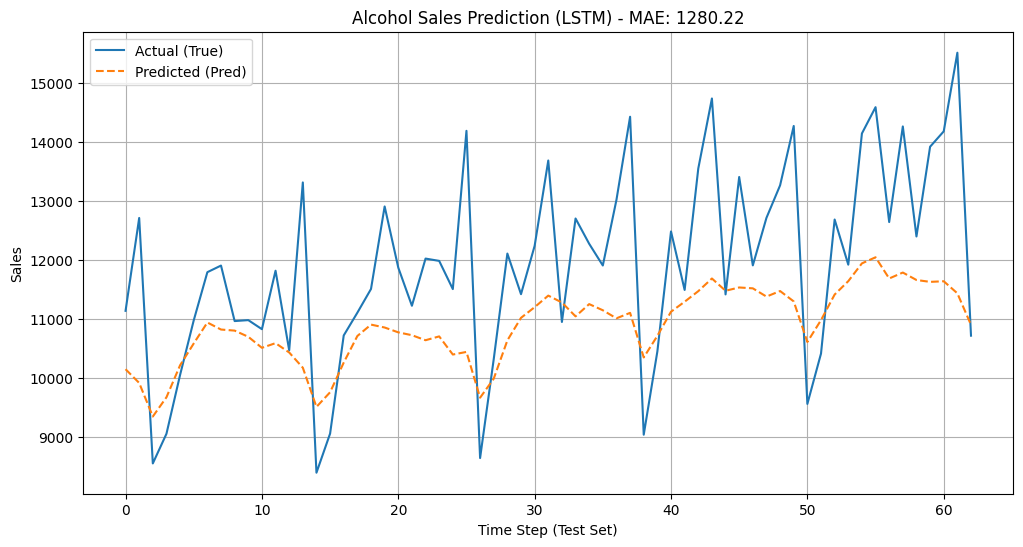

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual (True)')
plt.plot(pred_inv, label='Predicted (Pred)', linestyle='--')
plt.title(f'Alcohol Sales Prediction (LSTM) - MAE: {mae_actual:.2f}')
plt.xlabel('Time Step (Test Set)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.savefig('alcohol_sales_prediction_lstm.png')